<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

sns.set_context('talk')
sns.set_style('darkgrid')
pd.set_option("display.max_columns", None)

In [2]:
def is_one_to_one(df, col1, col2):
    first = df.drop_duplicates([col1, col2]).groupby(col1)[col2].count().max()
    second = df.drop_duplicates([col1, col2]).groupby(col2)[col1].count().max()
    return first + second == 2

In [3]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    
    Thanks https://stackoverflow.com/questions/42877802/pandas-dataframe-join-items-in-range-based-on-their-geo-coordinates-longitude
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

In [4]:
melb_df = pd.read_csv(
    "https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv",
    parse_dates=["Date"]
)

# Transformamos las col cat 'type' y 'method' a numericas
melb_df["seller_cat"] = LabelEncoder().fit_transform(melb_df.SellerG)
melb_df["method_cat"] = LabelEncoder().fit_transform(melb_df.Method)
melb_df["type_cat"] = LabelEncoder().fit_transform(melb_df.Type)
melb_df["suburb_cat"] = LabelEncoder().fit_transform(melb_df.Suburb)
melb_df["region_name_cat"] = LabelEncoder().fit_transform(melb_df.Regionname)
melb_df["council_area_cat"] = LabelEncoder().fit_transform(melb_df.CouncilArea)

# Ordeno un poco las columnas y unifico los nombres a snake_cases
melb_df = melb_df[[
    "Date",
    "SellerG",
    "Method",
    "Type",
    "Regionname",
    "Suburb",
    "CouncilArea",
    "Address",
    "seller_cat",
    "method_cat",
    "type_cat",
    "region_name_cat",
    "council_area_cat",
    "suburb_cat",
    "Postcode",
    "Lattitude",
    "Longtitude",
    "Distance",
    "Propertycount",
    "Price",
    "YearBuilt",
    "Landsize",
    "BuildingArea",
    "Rooms",
    "Bedroom2",
    "Bathroom",
    "Car",
]]

melb_df.columns = [
    "date",
    "seller",
    "method",
    "type",
    "region_name",
    "suburb",
    "council_area",
    "address",
    "seller_cat",
    "method_cat",
    "type_cat",
    "region_name_cat",
    "council_area_cat",
    "suburb_cat",
    "postcode",
    "lat",
    "lng",
    "distance",
    "property_count",
    "price",
    "year_built",
    "land_size",
    "building_area",
    "rooms",
    "bedroom_2",
    "bathroom",
    "car",
]

for col in ["postcode", "property_count", "bedroom_2", "bathroom"]:
    melb_df[col] = melb_df[col].astype(int)

melb_df.head()

,date,seller,method,type,region_name,suburb,council_area,address,seller_cat,method_cat,type_cat,region_name_cat,council_area_cat,suburb_cat,postcode,lat,lng,distance,property_count,price,year_built,land_size,building_area,rooms,bedroom_2,bathroom,car
0,2016-03-12,Biggin,S,h,Northern Metropolitan,Abbotsford,Yarra,85 Turner St,23,1,0,2,31,0,3067,-37.7996,144.9984,2.5,4019,1480000.0,NaN,202.0,NaN,2,2,1,1.0
1,2016-04-02,Biggin,S,h,Northern Metropolitan,Abbotsford,Yarra,25 Bloomburg St,23,1,0,2,31,0,3067,-37.8079,144.9934,2.5,4019,1035000.0,1900.0,156.0,79.0,2,2,1,0.0
2,2017-04-03,Biggin,SP,h,Northern Metropolitan,Abbotsford,Yarra,5 Charles St,23,3,0,2,31,0,3067,-37.8093,144.9944,2.5,4019,1465000.0,1900.0,134.0,150.0,3,3,2,0.0
3,2017-04-03,Biggin,PI,h,Northern Metropolitan,Abbotsford,Yarra,40 Federation La,23,0,0,2,31,0,3067,-37.7969,144.9969,2.5,4019,850000.0,NaN,94.0,NaN,3,3,2,1.0
4,2016-04-06,Nelson,VB,h,Northern Metropolitan,Abbotsford,Yarra,55a Park St,155,4,0,2,31,0,3067,-37.8072,144.9941,2.5,4019,1600000.0,2014.0,120.0,142.0,4,3,1,2.0


In [5]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              13580 non-null  datetime64[ns]
 1   seller            13580 non-null  object        
 2   method            13580 non-null  object        
 3   type              13580 non-null  object        
 4   region_name       13580 non-null  object        
 5   suburb            13580 non-null  object        
 6   council_area      12211 non-null  object        
 7   address           13580 non-null  object        
 8   seller_cat        13580 non-null  int64         
 9   method_cat        13580 non-null  int64         
 10  type_cat          13580 non-null  int64         
 11  region_name_cat   13580 non-null  int64         
 12  council_area_cat  13580 non-null  int64         
 13  suburb_cat        13580 non-null  int64         
 14  postcode          1358

In [6]:
melb_df.describe()

,seller_cat,method_cat,type_cat,region_name_cat,council_area_cat,suburb_cat,postcode,lat,lng,distance,property_count,price,year_built,land_size,building_area,rooms,bedroom_2,bathroom,car
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,1.358000e+04,8205.000000,13580.000000,7130.000000,13580.000000,13580.000000,13580.000000,13518.000000
mean,130.810972,1.407290,0.526362,3.766053,16.605670,155.307953,3105.301915,-37.809203,144.995216,10.137776,7454.417378,1.075684e+06,1964.684217,558.416127,151.967650,2.937997,2.914728,1.534242,1.610075
std,77.735927,1.119105,0.832878,2.024334,10.821556,90.307844,90.676964,0.079260,0.103916,5.868725,4378.581772,6.393107e+05,37.273762,3990.669241,541.014538,0.955748,0.965921,0.691712,0.962634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3000.000000,-38.182550,144.431810,0.000000,249.000000,8.500000e+04,1196.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,73.000000,1.000000,0.000000,2.000000,6.000000,70.000000,3044.000000,-37.856822,144.929600,6.100000,4380.000000,6.500000e+05,1940.000000,177.000000,93.000000,2.000000,2.000000,1.000000,1.000000
50%,135.000000,1.000000,0.000000,5.000000,18.000000,154.000000,3084.000000,-37.802355,145.000100,9.200000,6555.000000,9.030000e+05,1970.000000,440.000000,126.000000,3.000000,3.000000,1.000000,2.000000
75%,194.000000,1.000000,1.000000,5.000000,25.000000,234.000000,3148.000000,-37.756400,145.058305,13.000000,10331.000000,1.330000e+06,1999.000000,651.000000,174.000000,3.000000,3.000000,2.000000,2.000000
max,267.000000,4.000000,2.000000,7.000000,33.000000,313.000000,3977.000000,-37.408530,145.526350,48.100000,21650.000000,9.000000e+06,2018.000000,433014.000000,44515.000000,10.000000,20.000000,8.000000,10.000000


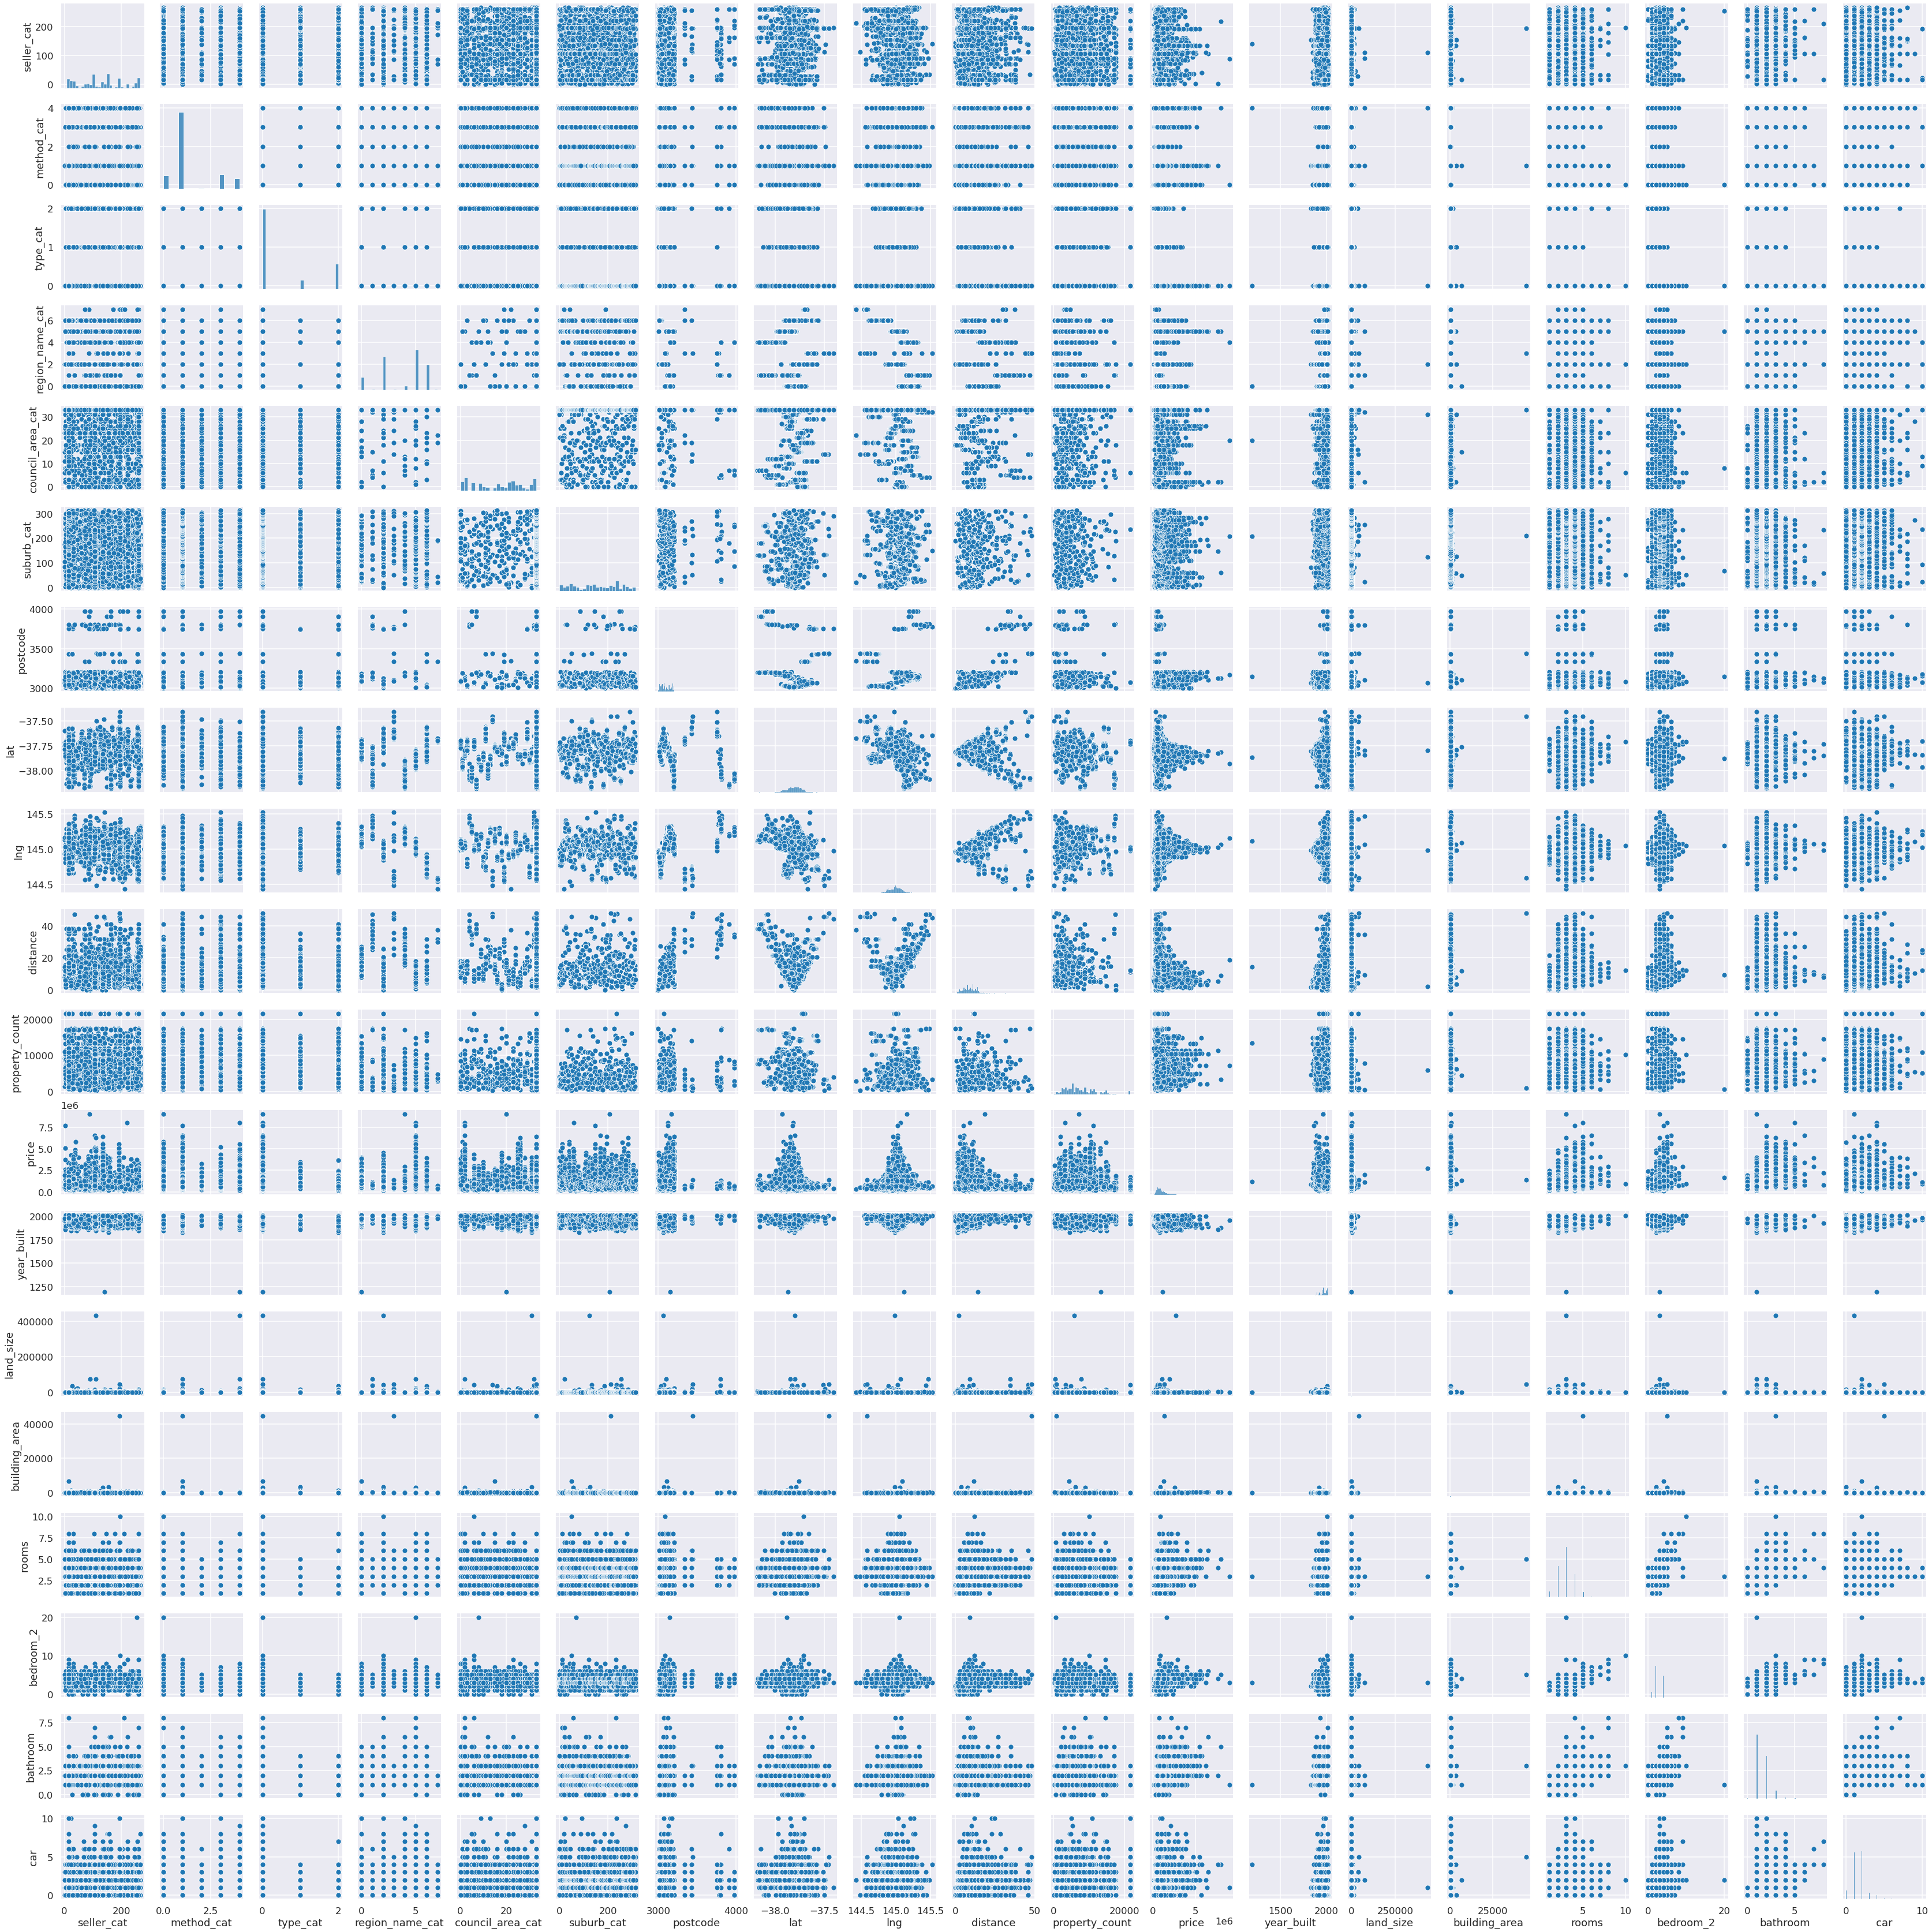

In [7]:
sns.pairplot(melb_df)

Eliminar valores extremo de:
    - year_built
    - land_size
    - building_area
    
En el precio tengo mis dudas si tenemos o no que eliminar valores 

<AxesSubplot:xlabel='price', ylabel='Count'>

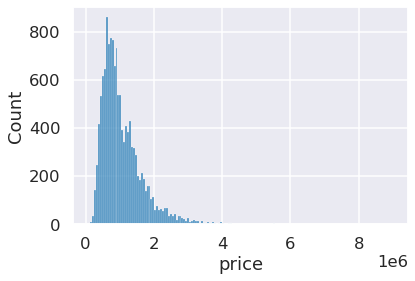

In [8]:
sns.histplot(data=melb_df, x="price")

In [9]:
melb_df[melb_df.price > 2e6]

,date,seller,method,type,region_name,suburb,council_area,address,seller_cat,method_cat,type_cat,region_name_cat,council_area_cat,suburb_cat,postcode,lat,lng,distance,property_count,price,year_built,land_size,building_area,rooms,bedroom_2,bathroom,car
80,2017-04-03,Buxton,PI,h,Southern Metropolitan,Albert Park,Port Phillip,112 Beaconsfield Pde,32,0,0,5,25,4,3206,-37.84810,144.94990,3.3,3280,2850000.0,1890.0,211.0,198.0,3,3,2,0.0
85,2016-07-05,Marshall,S,h,Southern Metropolitan,Albert Park,Port Phillip,104 Richardson St,135,1,0,5,25,4,3206,-37.84470,144.95230,3.3,3280,2300000.0,1880.0,153.0,180.0,4,4,2,1.0
88,2016-10-09,Greg,S,h,Southern Metropolitan,Albert Park,Port Phillip,29 Faussett St,85,1,0,5,25,4,3206,-37.84220,144.95540,3.3,3280,2120000.0,1900.0,199.0,107.0,2,2,1,1.0
92,2016-10-12,Cayzer,S,h,Southern Metropolitan,Albert Park,Port Phillip,2 Dundas Pl,41,1,0,5,25,4,3206,-37.84150,144.95850,3.3,3280,2615000.0,1880.0,177.0,181.0,3,3,2,1.0
93,2016-10-12,Greg,S,h,Southern Metropolitan,Albert Park,Port Phillip,23 Finlay St,85,1,0,5,25,4,3206,-37.84360,144.95570,3.3,3280,2100000.0,NaN,237.0,NaN,5,5,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13521,2017-08-26,Marshall,SP,t,Southern Metropolitan,Port Melbourne,NaN,44 Garton St,135,3,1,5,33,232,3207,-37.83349,144.94840,3.5,8648,2455000.0,2010.0,123.0,0.0,4,4,3,2.0
13523,2017-08-26,Biggin,S,h,Southern Metropolitan,Prahran,NaN,69 Greville St,23,1,0,5,33,233,3181,-37.84879,144.98882,4.6,7717,2668000.0,NaN,383.0,NaN,4,4,2,2.0
13553,2017-08-26,Kay,S,h,Southern Metropolitan,Surrey Hills,NaN,20 Albert Cr,111,1,0,5,33,273,3127,-37.82421,145.10352,10.2,5457,2720000.0,1920.0,1005.0,NaN,4,4,3,2.0
13555,2017-08-26,Marshall,VB,h,Southern Metropolitan,Surrey Hills,NaN,3 Oak St,135,4,0,5,33,273,3127,-37.83564,145.10919,10.2,5457,3100000.0,NaN,832.0,NaN,4,4,2,3.0


2. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
    1. Justificar cada columna no seleccionada.
    2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

<AxesSubplot:>

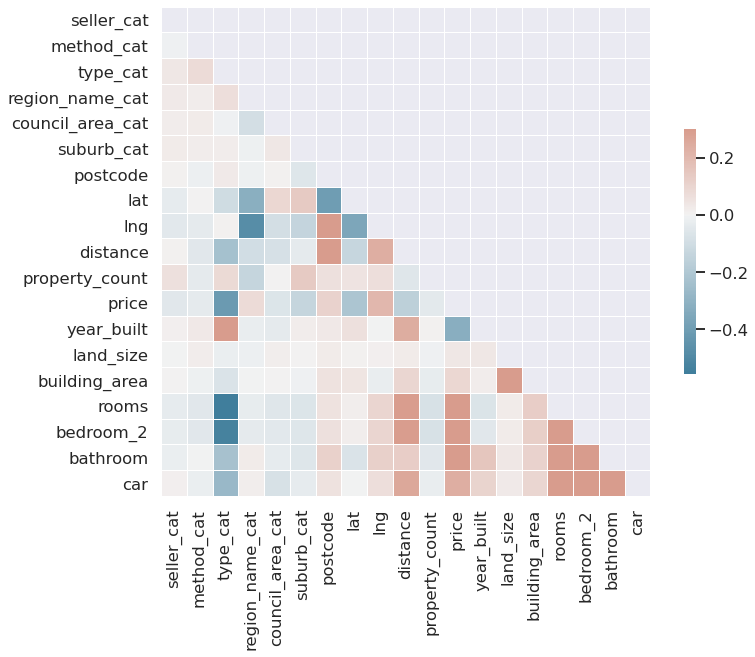

In [10]:
# Matriz de correlation de las variables numericas
corr = melb_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(12, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
# Un postcode puede ser de varios subirbuios. En cambio, cada suburbio tiene uno y solo un postcode.
# Nos quedamos con los postcode que nos más especificos
melb_df.groupby("suburb")["postcode"].nunique().max(), melb_df.groupby("postcode")["suburb"].nunique().max()

(1, 5)

In [13]:
drop_cols = [
    "date", # esos años tuvieron solo 2% de inflación por lo que no cambia el precio 
    "seller",
    "seller_cat",
    "method",
    "method_cat",
    "region_name",
    "region_name_cat",
    "council_area",
    "council_area_cat",
    "postcode",
    "address",
    "property_count", # Esto depende del sub y la info queda repetida
    "bedroom_2", # Coinciden en más de un 90% y el segundo viene de un scraper
]

cols = [c for c in melb_df.columns if c not in drop_cols]
melb_df = melb_df[cols]
melb_df.head()

,type,suburb,type_cat,suburb_cat,lat,lng,distance,price,year_built,land_size,building_area,rooms,bathroom,car
0,h,Abbotsford,0,0,-37.7996,144.9984,2.5,1480000.0,NaN,202.0,NaN,2,1,1.0
1,h,Abbotsford,0,0,-37.8079,144.9934,2.5,1035000.0,1900.0,156.0,79.0,2,1,0.0
2,h,Abbotsford,0,0,-37.8093,144.9944,2.5,1465000.0,1900.0,134.0,150.0,3,2,0.0
3,h,Abbotsford,0,0,-37.7969,144.9969,2.5,850000.0,NaN,94.0,NaN,3,2,1.0
4,h,Abbotsford,0,0,-37.8072,144.9941,2.5,1600000.0,2014.0,120.0,142.0,4,1,2.0


In [14]:
melb_df.groupby("type")["type"].count()

type
h    9449
t    1114
u    3017
Name: type, dtype: int64

In [15]:
melb_df.groupby("suburb")["suburb"].count().sort_values()

suburb
Montrose            1
Wallan              1
Healesville         1
Brookfield          1
Sandhurst           1
                 ... 
Brunswick         222
Preston           239
Bentleigh East    249
Richmond          260
Reservoir         359
Name: suburb, Length: 314, dtype: int64

`type` tiene una "buena" cantidad por categoria, pero `suburb` no. Vamos a tener que agrupar

3. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
     1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
     2. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
     3. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

In [16]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
    'description', 'neighborhood_overview', 'transit',
    'street', 'neighborhood', 'city', 'suburb',
    'state', 'zipcode', 'latitude', 'longitude',
    'price', 'weekly_price', 'monthly_price',
    'review_scores_location',
]
airbnb_df = pd.read_csv(
#     'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    "./data/cleansed_listings_dec18.csv",
    usecols=interesting_cols,
    low_memory=False,
)

airbnb_df.zipcode = pd.to_numeric(airbnb_df.zipcode, errors="coerce").fillna(0).astype(int)
airbnb_df.head()

,description,neighborhood_overview,transit,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price,review_scores_location
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"YES ! The bus (305,309) is exactly two blocks ...","Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN,9.0
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,Easy transport options - the tram is right out...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0,9.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,Our apartment is located within walking distan...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0,9.0
3,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...",Public transport is super convenient with a ch...,"Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071,-37.758971,144.989228,50,250.0,920.0,9.0
4,We offer comfortable accommodation in Inner Me...,NaN,NaN,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183,-37.864530,144.992238,69,400.0,1900.0,10.0


In [17]:
airbnb_df = airbnb_df[(airbnb_df.price > 0) & (airbnb_df.price < 300)]
airbnb_df.describe()

,zipcode,latitude,longitude,price,weekly_price,monthly_price,review_scores_location
count,21208.000000,21208.000000,21208.000000,21208.000000,2344.000000,1770.000000,16111.000000
mean,3093.283808,-37.826531,145.006039,115.449217,773.859642,2855.162147,9.711067
std,355.606947,0.065847,0.123844,60.431877,498.280034,1992.065571,0.696182
min,0.000000,-38.224427,144.484326,1.000000,91.000000,400.000000,2.000000
25%,3006.000000,-37.852257,144.957315,68.000000,430.000000,1600.000000,10.000000
50%,3067.000000,-37.817196,144.978060,105.000000,700.000000,2600.000000,10.000000
75%,3160.000000,-37.802800,145.012660,150.000000,1000.000000,3648.000000,10.000000
max,30122.000000,-37.486284,145.839127,299.000000,9899.000000,54258.000000,10.000000


In [20]:
suburb_melb = set(melb_df.suburb.tolist())
suburb_airbnb = set(airbnb_df.suburb.tolist())

print(f"Total de suburb en melb: {len(suburb_melb)}")
print(f"Total de suburb intersección: {len(suburb_melb.intersection(suburb_airbnb))}")
print(f"suburb que no están en airbnb: {suburb_melb.difference(suburb_airbnb)}")

Total de suburb en melb: 314
Total de suburb intersección: 296
suburb que no están en airbnb: {'Bacchus Marsh', 'Riddells Creek', 'Melton', 'Gisborne', 'Deepdene', 'Strathmore Heights', 'Croydon Hills', 'Campbellfield', 'Bullengarook', 'Skye', 'Yallambie', 'Ardeer', 'St Albans', 'St Helena', 'Taylors Lakes', 'Wallan', 'Coolaroo', 'New Gisborne'}


In [21]:
# Agrupo los airbnb que están a 1, 2.5 o 5 km de distancia del anuncio
# Y calculo algunos valores
# Esto toma un tiempo así anda por el mate

results = []
for i, row in melb_df.iterrows():
    if i % 100 == 0:
        print(f"\rProcesando fila: {i} de {len(melb_df)}", end="")

    airbnb_df["dist"] = haversine_np(airbnb_df.latitude, airbnb_df.longitude, row.lat, row.lng)

    result = {
        "lat": row.lat,
        "lng": row.lng,
    }

    for d in [1, 2, 2.5]:
        d = airbnb_df[airbnb_df.dist < d] \
            .agg({"dist": "count", "price": "mean", "review_scores_location": "mean"}) \
            .rename({"dist": f"count_{d}km", "price": f"price_mean_{d}km", "review_scores_location": f"review_mean_{d}km"})

        result = {**result, **d}
    results.append(result)

Procesando fila: 13500 de 13580

In [22]:
results = pd.DataFrame(results)
results.head()

,lat,lng,count_1km,price_mean_1km,review_mean_1km,count_2km,price_mean_2km,review_mean_2km,count_2.5km,price_mean_2.5km,review_mean_2.5km
0,-37.7996,144.9984,205.0,115.312195,9.652941,1146.0,120.191972,9.821814,1799.0,119.989994,9.850208
1,-37.8079,144.9934,424.0,123.297170,9.785311,1449.0,122.149068,9.852740,2002.0,122.017483,9.854309
2,-37.8093,144.9944,388.0,118.878866,9.786834,1389.0,122.575954,9.850401,2028.0,122.054241,9.845728
3,-37.7969,144.9969,203.0,121.965517,9.674699,1150.0,119.034783,9.822079,1826.0,118.261227,9.846995
4,-37.8072,144.9941,398.0,121.683417,9.763636,1421.0,122.434201,9.849913,1942.0,121.684346,9.859615


In [24]:
melb_df = pd.merge(melb_df, results, on=["lat", "lng"])
melb_df.head()

,type,suburb,type_cat,suburb_cat,lat,lng,distance,price,year_built,land_size,building_area,rooms,bathroom,car,count_1km_x,price_mean_1km_x,review_mean_1km_x,count_2km_x,price_mean_2km_x,review_mean_2km_x,count_2.5km_x,price_mean_2.5km_x,review_mean_2.5km_x,count_1km_y,price_mean_1km_y,review_mean_1km_y,count_2km_y,price_mean_2km_y,review_mean_2km_y,count_2.5km_y,price_mean_2.5km_y,review_mean_2.5km_y
0,h,Abbotsford,0,0,-37.7996,144.9984,2.5,1480000.0,NaN,202.0,NaN,2,1,1.0,205.0,115.312195,9.652941,1146.0,120.191972,9.821814,1799.0,119.989994,9.850208,205.0,115.312195,9.652941,1146.0,120.191972,9.821814,1799.0,119.989994,9.850208
1,h,Abbotsford,0,0,-37.8079,144.9934,2.5,1035000.0,1900.0,156.0,79.0,2,1,0.0,424.0,123.297170,9.785311,1449.0,122.149068,9.852740,2002.0,122.017483,9.854309,424.0,123.297170,9.785311,1449.0,122.149068,9.852740,2002.0,122.017483,9.854309
2,h,Abbotsford,0,0,-37.8093,144.9944,2.5,1465000.0,1900.0,134.0,150.0,3,2,0.0,388.0,118.878866,9.786834,1389.0,122.575954,9.850401,2028.0,122.054241,9.845728,388.0,118.878866,9.786834,1389.0,122.575954,9.850401,2028.0,122.054241,9.845728
3,h,Abbotsford,0,0,-37.7969,144.9969,2.5,850000.0,NaN,94.0,NaN,3,2,1.0,203.0,121.965517,9.674699,1150.0,119.034783,9.822079,1826.0,118.261227,9.846995,203.0,121.965517,9.674699,1150.0,119.034783,9.822079,1826.0,118.261227,9.846995
4,h,Abbotsford,0,0,-37.8072,144.9941,2.5,1600000.0,2014.0,120.0,142.0,4,1,2.0,398.0,121.683417,9.763636,1421.0,122.434201,9.849913,1942.0,121.684346,9.859615,398.0,121.683417,9.763636,1421.0,122.434201,9.849913,1942.0,121.684346,9.859615


In [26]:
melb_df.groupby("count_1km_x")["count_1km_x"].count().sort_values()

count_1km_x
3920.0       1
733.0        1
732.0        1
728.0        1
723.0        1
          ... 
4.0        336
13.0       337
18.0       343
626.0      512
718.0     1794
Name: count_1km_x, Length: 894, dtype: int64

:up: Vamos a tener que imputar algunos valores

Teniendo la lat y lng de cada casa, podemos usar la api de open streen map para buscar información relevante en la cercania de las propiedades como:
- Escuelas
- Plazas
- Supermercados

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



- Imputar la cantidad de baños considerando la cantidad de habitaciones y el sub
- Imputar el tamaño del terreno segun la cantidad de habitaciones, baños y sub

## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.